# Decision Tree - Rain Forest - XGBoost Lab

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_pickle('saved_df.pkl')

In [5]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [6]:
df.shape

(707, 9)

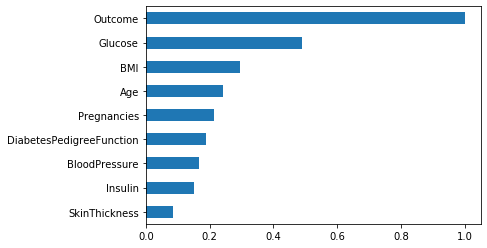

In [8]:
df.corr()["Outcome"].sort_values().plot.barh();

In [9]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [10]:
# stratify data'nin y target'indaki 1-0 oranini koruyor

In [11]:
y.value_counts()

0    468
1    239
Name: Outcome, dtype: int64

**Logistic Regression**

In [12]:
log_model=LogisticRegression()
log_model.fit(X_train,y_train)
y_pred=log_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        94
           1       0.71      0.60      0.65        48

    accuracy                           0.78       142
   macro avg       0.76      0.74      0.75       142
weighted avg       0.78      0.78      0.78       142



**KNN**

In [13]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
knn_model = KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



**Decision Tree**

In [15]:
# X_train scle edildigi icin tekrar olusturup fit edecegiz

In [16]:
X=df.drop(["Outcome"], axis=1)
y=df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, stratify=y, random_state=42)

In [17]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [19]:
y_pred = dt_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78        94
           1       0.56      0.50      0.53        48

    accuracy                           0.70       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.69      0.70      0.69       142



**Random Forest**

In [20]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [22]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        94
           1       0.62      0.52      0.57        48

    accuracy                           0.73       142
   macro avg       0.70      0.68      0.69       142
weighted avg       0.72      0.73      0.73       142



**RF Tuning**

In [23]:
rf = RandomForestClassifier()

In [25]:
rf_params = {'n_estimators' : [50, 100, 300],
             'max_depth': [3, 5, 7],
             'max_features': [2, 4, 6, 8],
             'min_samples_split': [2, 4, 6]
}

In [26]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   26.2s finished


In [27]:
rf_cv_model.best_params_

{'max_depth': 3, 'max_features': 4, 'min_samples_split': 6, 'n_estimators': 50}

In [36]:
rf_tuned = RandomForestClassifier(max_depth = 15,
                                  max_features = 4,
                                  min_samples_split = 6,
                                  n_estimators = 300).fit(X_train, y_train)

In [35]:
y_pred = rf_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        94
           1       0.77      0.50      0.61        48

    accuracy                           0.78       142
   macro avg       0.78      0.71      0.73       142
weighted avg       0.78      0.78      0.77       142



In [37]:
y_pred = rf_tuned.predict(X_test) # degrleri degistirdim - 15 - 4 - 6 -300
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.82        94
           1       0.67      0.58      0.62        48

    accuracy                           0.76       142
   macro avg       0.73      0.72      0.72       142
weighted avg       0.75      0.76      0.76       142



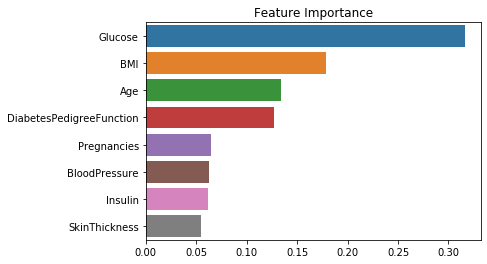

In [38]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

**XGBOOST**

In [39]:
!pip install xgboost

In [40]:
from xgboost import XGBClassifier

In [41]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [42]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



In [44]:
y_pred = xgb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]], dtype=int64)

**Tuning for XGBoost**

In [45]:
xgb = XGBClassifier()

In [46]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [47]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   12.7s
[Parallel(n_jobs=-1)]: Done 382 out of 405 | elapsed:   16.0s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:   16.3s finished


In [48]:
xgb_cv_model.best_params_

{'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 300, 'subsample': 1}

In [49]:
xgb_tuned = XGBClassifier(learning_rate= 0.3,
                                max_depth= 5,
                                n_estimators= 300,
                                subsample= 1).fit(X_train, y_train)

In [50]:
y_pred = xgb_tuned.predict(X_test)

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.82      0.79        94
           1       0.57      0.48      0.52        48

    accuracy                           0.70       142
   macro avg       0.66      0.65      0.65       142
weighted avg       0.69      0.70      0.70       142



In [52]:
confusion_matrix(y_test, y_pred)

array([[77, 17],
       [25, 23]], dtype=int64)

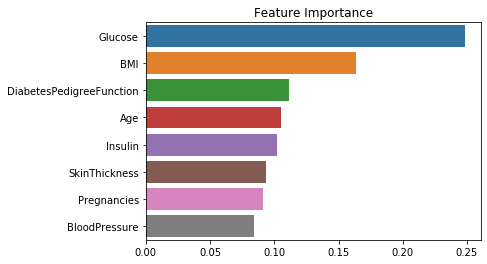

In [53]:
feature_imp = pd.Series(xgb_tuned.feature_importances_,
                        index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()